In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re

In C:\Users\mayur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mayur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mayur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\mayur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mayur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
tweets=pd.read_csv('Tweets.csv')

In [3]:
tweets.head()

,Unnamed: 0,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,hashtags
0,0,abhijithvr8,"#MechanicalEngineer , organic farming, fan of ...",GodsOwnCountry,40,17,2101,2014-10-17 08:14:15,2020-08-23 07:30:09,1,0,Called upon the educational institutions to st...,"[{'text': 'NEP', 'indices': [76, 80]}]"
1,1,VMBJP,Minister of State for External Affairs & Parli...,"Thiruvananthapuram, Keralam",465,63974,6776,2009-09-29 13:47:24,2020-08-23 07:27:14,1,2,Called upon the educational institutions to st...,"[{'text': 'NEP', 'indices': [65, 69]}, {'text'..."
2,2,Sunilpr87505336,NaN,NaN,163,5,34,2018-10-28 10:41:42,2020-08-23 07:23:21,20,0,While #NEP is aiming to bring phenomenal chang...,"[{'text': 'NEP', 'indices': [24, 28]}]"
3,3,Sushreesuchar13,NaN,NaN,5,11,2396,2020-06-26 18:01:20,2020-08-23 07:21:51,2,0,@DrRPNishank @narendramodi @AmitShah @PMOIndia...,[]
4,4,SamPrak56246760,cinematographer,NaN,38,7,28,2020-07-08 09:41:24,2020-08-23 07:09:32,281,0,Join me as I take you on the journey of transf...,[]


In [4]:
#Lets drop the unnecessary columns
tweets.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
tweets.dtypes

username          object
acctdesc          object
location          object
following          int64
followers          int64
totaltweets        int64
usercreatedts     object
tweetcreatedts    object
retweetcount       int64
likes              int64
text              object
hashtags          object
dtype: object

In [6]:
#Here we will grab the mentioned entities by using regular expressions!

In [7]:
def extract_entities(x):#Extracting the @ mentioned in tweets
    username=re.findall('@[^\s]+',x)
    return username
    
tweets['@mentioned']=tweets['text'].apply(lambda x:extract_entities(x))

In [8]:
#For removing all the hyperlinks if mentioned if the tweets
def removing_hyperlinksfromtweets(string):
    text = re.sub(r"(?:\@|https?\://)\S+", "",string)
    return text

In [9]:
tweets['text']=tweets['text'].apply(lambda x:removing_hyperlinksfromtweets(x))

In [10]:
#Here we just extract all the hasgtags mentioned in the tweets without using regex
def extract_hash_tags(s):
     return set(part[1:] for part in s.split() if part.startswith('#'))
tweets['hastags']=tweets['text'].apply(lambda x: extract_hash_tags(x))
    

In [11]:
#Simply removing the hashtags and text after it
def remove_hastags(x):
    tweet = re.sub(r'#([^\s]+)','', x) # removing hahtags
    return tweet

In [12]:
tweets['text']=tweets['text'].apply(lambda x: remove_hastags(x))

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [14]:
#stopwords=set(stopwords.words('english'))
#stopwords

In [15]:
#if 'not' in stopwords:
    #print(True)

In [16]:
#len(stopwords)

In [17]:
#def removing_stopwords(x):
    #tokens=word_tokenize(x,language='english')
    #words=[words for words in tokens if not words in stopwords]    
    #sentence='  '.join(words)
    #return sentence

In [18]:
#tweets['text']=tweets['text'].apply(lambda x: removing_stopwords(x))

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#tweets['text']=tweets['text'].apply(lambda x:removing_stopwords(x))

In [21]:
#Removing emojis copied straight from STACKOVERFLOW
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [22]:
tweets['text']=tweets['text'].apply(lambda x: remove_emoji(x))

In [23]:
tweets.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,hashtags,@mentioned,hastags
0,abhijithvr8,"#MechanicalEngineer , organic farming, fan of ...",GodsOwnCountry,40,17,2101,2014-10-17 08:14:15,2020-08-23 07:30:09,1,0,Called upon the educational institutions to st...,"[{'text': 'NEP', 'indices': [76, 80]}]","[@narendramodi, @AmitShah, @DrRPNishank]","{Atmanirbhar, NEP}"
1,VMBJP,Minister of State for External Affairs & Parli...,"Thiruvananthapuram, Keralam",465,63974,6776,2009-09-29 13:47:24,2020-08-23 07:27:14,1,2,Called upon the educational institutions to st...,"[{'text': 'NEP', 'indices': [65, 69]}, {'text'...","[@narendramodi, @AmitShah, @DrRPNishank]","{Atmanirbhar, NEP}"
2,Sunilpr87505336,NaN,NaN,163,5,34,2018-10-28 10:41:42,2020-08-23 07:23:21,20,0,While is aiming to bring phenomenal changes t...,"[{'text': 'NEP', 'indices': [24, 28]}]","[@EduMinOfIndia, @DrRPNishank]","{NEPTransformingIndia, NEP, NEP2020}"
3,Sushreesuchar13,NaN,NaN,5,11,2396,2020-06-26 18:01:20,2020-08-23 07:21:51,2,0,Respected sir u always tweet about ...,[],"[@DrRPNishank, @narendramodi, @AmitShah, @PMOI...","{neet, jee, nep, postponejeeneet}"
4,SamPrak56246760,cinematographer,NaN,38,7,28,2020-07-08 09:41:24,2020-08-23 07:09:32,281,0,Join me as I take you on the journey of transf...,[],[],"{NewEducationPolicy, NEP2020., NEP., Education}"


In [24]:
#import preprocessor as p #a library to clean tweets

In [25]:
#def cleaning_text(x):
    #cleaned=p.clean(x)
    #return cleaned

In [26]:
#tweets['text']=tweets['text'].apply(lambda x: cleaning_text(x))

In [27]:
import nltk
words = set(nltk.corpus.words.words())
def removing_nonengwords(x):
    eng=" ".join(w for w in nltk.wordpunct_tokenize(x) \
            if w.lower() in words or not w.isalpha())
    return eng

In [28]:
tweets['text']=tweets['text'].apply(lambda x: removing_nonengwords(x))

In [29]:
tweets['text'][0:10].values

array(["upon the educational to study and understand and help build an education system that our youth become & ; regain ' s position as the Knowledge of the World i ., e .",
       "upon the educational to study and understand and help build an education system that our youth become & ; regain ' s position as the Knowledge of the World i ., e .",
       "While is aiming to bring phenomenal to country ' s education system , this video by how 5 + 3 + 3 + 4 structure under , will work towards overall learning , development & ; knowledge enhancement of .",
       "sir u always tweet about in every four - five . Why don ' t u take out a little time to the solve problem of and . They are anxious about the situation if u have a little concern about the student please come up and help them",
       'Join me as I take you on the journey of transformation that higher education in will undergo as a result of Register : to know how can strategize effective implementation of',
       "sir u always

In [30]:
from textblob import TextBlob



In [31]:
tweets['text']=tweets['text'].apply(lambda x: ' '.join(x.lower() for x in x.split(' '))) #Convertng to lower case

## Custom stopwords

In [32]:
stopwords=['the','is','for','a','on','or','with','be','it','of','will','to','have','get','i','and','in','you']#Custom stopwords

In [33]:
tweets['text'] = tweets['text'].str.replace('[^\w\s]', '') #remove special characters and punctuation

In [34]:
tweets['text'][0:4]

0    upon the educational to study and understand a...
1    upon the educational to study and understand a...
2    while is aiming to bring phenomenal to country...
3    sir u always tweet about in every four  five  ...
Name: text, dtype: object

In [35]:
tweets['text']=tweets['text'].apply(lambda x:' '.join(t for t in x.split() if t not in stopwords))#Removing selected stopwords

In [36]:
tweets['text'][0:4]


0    upon educational study understand help build a...
1    upon educational study understand help build a...
2    while aiming bring phenomenal country s educat...
3    sir u always tweet about every four five why d...
Name: text, dtype: object

In [37]:
#Frequency of common words which occur in all tweets=
common_words=pd.Series(' '.join(tweets['text']).split()).value_counts()[:10]

In [38]:
common_words

education    2170
your         1589
as           1501
we           1411
new          1371
this         1259
that         1224
under         940
by            929
s             917
dtype: int64

In [39]:
from textblob import TextBlob


In [40]:
#Spelling correction using TextBlob
#tweets['text']=tweets['text'].apply(lambda x: str(TextBlob(x).correct()))

In [41]:
#Removing single charaters from our tweets: FROM STACKOVERFLOW
            
tweets['text']=tweets['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))

In [42]:
tweets[5:7]

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,hashtags,@mentioned,hastags
5,varnaVS1,NaN,NaN,3,1,1140,2020-06-24 02:34:39,2020-08-23 07:08:53,2,0,sir always tweet about every four five why don...,[],"[@DrRPNishank, @narendramodi, @AmitShah, @PMOI...","{neet, jee, nep, postponejeeneet}"
6,bijay1213kumar,NaN,Berhampur,153,40,528,2013-11-24 13:38:08,2020-08-23 07:06:57,281,0,join me as take journey transformation that hi...,[],[],"{NewEducationPolicy, NEP2020., NEP., Education}"


In [43]:
tweets.loc[tweets.location.isna(),'location']='Unknown'
#Filling na values in location

In [44]:
tweets.drop('hashtags',axis=1,inplace=True)

In [45]:
tweets['@mentioned']=tweets['@mentioned'].astype('str')

In [46]:
tweets.dtypes

username          object
acctdesc          object
location          object
following          int64
followers          int64
totaltweets        int64
usercreatedts     object
tweetcreatedts    object
retweetcount       int64
likes              int64
text              object
@mentioned        object
hastags           object
dtype: object

In [47]:
(tweets['@mentioned'][4])

'[]'

In [48]:
tweets[2:6]

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,@mentioned,hastags
2,Sunilpr87505336,NaN,Unknown,163,5,34,2018-10-28 10:41:42,2020-08-23 07:23:21,20,0,while aiming bring phenomenal country educatio...,"['@EduMinOfIndia', '@DrRPNishank']","{NEPTransformingIndia, NEP, NEP2020}"
3,Sushreesuchar13,NaN,Unknown,5,11,2396,2020-06-26 18:01:20,2020-08-23 07:21:51,2,0,sir always tweet about every four five why don...,"['@DrRPNishank', '@narendramodi', '@AmitShah',...","{neet, jee, nep, postponejeeneet}"
4,SamPrak56246760,cinematographer,Unknown,38,7,28,2020-07-08 09:41:24,2020-08-23 07:09:32,281,0,join me as take journey transformation that hi...,[],"{NewEducationPolicy, NEP2020., NEP., Education}"
5,varnaVS1,NaN,Unknown,3,1,1140,2020-06-24 02:34:39,2020-08-23 07:08:53,2,0,sir always tweet about every four five why don...,"['@DrRPNishank', '@narendramodi', '@AmitShah',...","{neet, jee, nep, postponejeeneet}"


In [49]:
import textblob

In [50]:
def finding_polarity(x):
    x=str(x)
    d=TextBlob(x)
    polarity=d.sentiment.polarity
    if ((polarity<=0.1) & (polarity>=-0.1)):
        return 'neutral'
    elif (polarity>0.1):
        return 'positive'
    else:
        return 'negative'
        

In [51]:
tweets['Sentiment']=tweets['text'].apply(lambda x: finding_polarity(x))

In [52]:
tweets

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,@mentioned,hastags,Sentiment
0,abhijithvr8,"#MechanicalEngineer , organic farming, fan of ...",GodsOwnCountry,40,17,2101,2014-10-17 08:14:15,2020-08-23 07:30:09,1,0,upon educational study understand help build a...,"['@narendramodi', '@AmitShah', '@DrRPNishank']","{Atmanirbhar, NEP}",positive
1,VMBJP,Minister of State for External Affairs & Parli...,"Thiruvananthapuram, Keralam",465,63974,6776,2009-09-29 13:47:24,2020-08-23 07:27:14,1,2,upon educational study understand help build a...,"['@narendramodi', '@AmitShah', '@DrRPNishank']","{Atmanirbhar, NEP}",positive
2,Sunilpr87505336,NaN,Unknown,163,5,34,2018-10-28 10:41:42,2020-08-23 07:23:21,20,0,while aiming bring phenomenal country educatio...,"['@EduMinOfIndia', '@DrRPNishank']","{NEPTransformingIndia, NEP, NEP2020}",positive
3,Sushreesuchar13,NaN,Unknown,5,11,2396,2020-06-26 18:01:20,2020-08-23 07:21:51,2,0,sir always tweet about every four five why don...,"['@DrRPNishank', '@narendramodi', '@AmitShah',...","{neet, jee, nep, postponejeeneet}",negative
4,SamPrak56246760,cinematographer,Unknown,38,7,28,2020-07-08 09:41:24,2020-08-23 07:09:32,281,0,join me as take journey transformation that hi...,[],"{NewEducationPolicy, NEP2020., NEP., Education}",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,govindasmritu,"Indian, Secular, Liberal, Feminist, who Strong...",Unknown,322,107,12437,2020-02-27 08:38:32,2020-08-14 19:48:37,0,0,question did we elect our how they legally bee...,[],"{narendra, NEP, rss, IndependenceDayIndia}",positive
5352,CostovationEdu,Giving back through life-changing experiences.,Chandigarh,8,10,17,2020-06-13 21:42:03,2020-08-14 19:29:28,0,0,happy independence day 2020 se,[],"{NewEducationPolicy, tricolor, indian, happyin...",positive
5353,Ravikum87679623,NaN,Unknown,8,0,38,2020-06-20 15:17:44,2020-08-14 19:20:54,4,0,leave topic clear problem regarding neet 56000...,"['@DrRPNishank', '@narendramodi']","{NEP, SOPCantSaveJEE_NEE, postpondNEETandJEE}",positive
5354,bentzioncastro,Language enthusiast\nMother tongue 🇪🇦\nSpeak 🇬...,Unknown,380,165,8799,2014-08-07 23:24:18,2020-08-14 18:56:06,12,0,we support cause linguistic equality we part t...,[],"{NewEducationPolicy, Tulu, EducationInTulu, NE...",neutral


In [53]:
tweets.drop_duplicates(subset='text',keep='first',inplace=True)

In [54]:
tweets.shape

(740, 14)

In [55]:
tweets

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,likes,text,@mentioned,hastags,Sentiment
0,abhijithvr8,"#MechanicalEngineer , organic farming, fan of ...",GodsOwnCountry,40,17,2101,2014-10-17 08:14:15,2020-08-23 07:30:09,1,0,upon educational study understand help build a...,"['@narendramodi', '@AmitShah', '@DrRPNishank']","{Atmanirbhar, NEP}",positive
2,Sunilpr87505336,NaN,Unknown,163,5,34,2018-10-28 10:41:42,2020-08-23 07:23:21,20,0,while aiming bring phenomenal country educatio...,"['@EduMinOfIndia', '@DrRPNishank']","{NEPTransformingIndia, NEP, NEP2020}",positive
3,Sushreesuchar13,NaN,Unknown,5,11,2396,2020-06-26 18:01:20,2020-08-23 07:21:51,2,0,sir always tweet about every four five why don...,"['@DrRPNishank', '@narendramodi', '@AmitShah',...","{neet, jee, nep, postponejeeneet}",negative
4,SamPrak56246760,cinematographer,Unknown,38,7,28,2020-07-08 09:41:24,2020-08-23 07:09:32,281,0,join me as take journey transformation that hi...,[],"{NewEducationPolicy, NEP2020., NEP., Education}",positive
10,just_thefact,news feed from sources,Unknown,92,1,15,2020-08-21 16:26:51,2020-08-23 06:53:43,357,0,we understand might lot related order address ...,['@DrRPNishank'],"{NEPTransformingIndia, NEP2020., NEP,}",positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,VeElanS,Proud Tamilan. I will protect and uphold human...,Unknown,572,470,4796,2010-01-11 08:27:49,2020-08-14 22:35:18,0,0,another impose,[],"{NEP, Hindi, StopHindiImposition}",neutral
5345,sathyaccl5206,PhD Scholar @ Centre for Informal Sector & Lab...,"New Delhi, India",268,52,1049,2012-09-22 07:21:07,2020-08-14 20:07:51,0,0,push constitutional amendment article 21,"['@HRDMinistry', '@PrakashJavdekar']","{NewEducationPolicy, NEP}",neutral
5346,Kanika8418,Enthusiastic publicist who loves Shopping and ...,Mumbai,262,216,668,2011-08-09 10:24:18,2020-08-14 20:03:24,6,0,how our system now evolve how does change sect...,"['@bijoyksahoo,', '@SAISchool,']","{NEP, education, CommsHighTable}",neutral
5351,govindasmritu,"Indian, Secular, Liberal, Feminist, who Strong...",Unknown,322,107,12437,2020-02-27 08:38:32,2020-08-14 19:48:37,0,0,question did we elect our how they legally bee...,[],"{narendra, NEP, rss, IndependenceDayIndia}",positive


In [56]:
import seaborn as sns
sns.set_style('darkgrid')


Text(0.5, 0, 'Emotion')

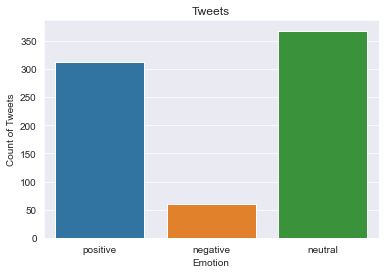

In [89]:
sns.countplot(x='Sentiment',data=tweets)
plt.title('Tweets')
plt.ylabel('Count of Tweets')
plt.xlabel('Emotion')

In [58]:
type(tweets.hastags[0])

set

In [59]:
#top 5 users with highest retweet  count
topusernames=tweets.sort_values(by=['retweetcount'],ascending=False)[0:10][['username','retweetcount']]

In [60]:
tweets.columns=tweets.columns.str.strip()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AbhiSharma_29'),
  Text(1, 0, 'HMarakwade'),
  Text(2, 0, 'Bharatbhesjaliy'),
  Text(3, 0, 'just_thefact'),
  Text(4, 0, 'hsg5040'),
  Text(5, 0, 'BJP4Kukrel_CG'),
  Text(6, 0, 'SamPrak56246760'),
  Text(7, 0, 'saprateev'),
  Text(8, 0, 'Chinna47513444'),
  Text(9, 0, 'KarnakantiSai')])

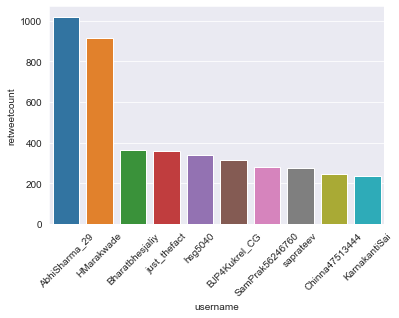

In [61]:
sns.barplot(x='username',y='retweetcount',data=topusernames)
plt.xticks(rotation=45)

In [62]:
has_count={}

In [63]:
#Whch hashtags wer the most used 
def most_hastags(x):
    if len(x)!=0:
        for i in x:
            if i in has_count.keys():
                has_count[i]+=1
            else:
                has_count[i]=1
    return has_count    

In [64]:
tweets['hastags']=[list(i) for i in tweets['hastags']]

In [65]:
for x in tweets['hastags']:
    most_hastags(x)

In [66]:
most_hashtags=pd.DataFrame(data=has_count.items(),
                           columns=['hashtags','count'])

In [67]:
most_hashtags=most_hashtags.sort_values(by='count',ascending=False)[0:10]

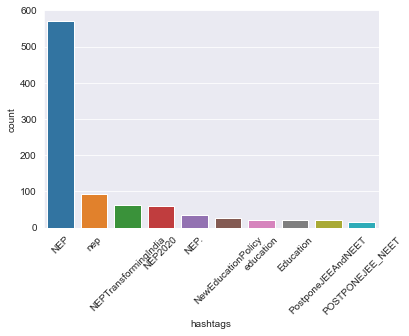

In [68]:
sns.barplot(x='hashtags',y='count',data=most_hashtags)
plt.xticks(rotation=45)
plt.show()


In [69]:
sentis=tweets.groupby('Sentiment')['text']

In [70]:
negative=sentis.get_group('negative')

In [71]:
neg_words={}
type(neg_words)


dict

In [72]:
def most_used_words_negative(x):
    x=str(x)
    t=word_tokenize(x)
    for i in t:
        if len(i)>5:
            if i in neg_words.keys():
                neg_words[i]+=1
            else:
                neg_words[i]=1
    return neg_words            
                
                
                
                
            
            
        

In [73]:
for d in negative:
    most_used_words_negative(d)

In [74]:
negatives=pd.DataFrame(data=[neg_words.keys(),neg_words.values()]).T

In [75]:
negatives.sort_values(by=1,ascending=False)

,0,1
8,education,14
9,minister,8
6,student,7
7,please,6
37,matter,5
...,...,...
94,sleeping,1
95,population,1
96,continue,1
97,demanding,1


In [76]:
common_metions={}

In [77]:
char_to_remove=['[',']','"']

In [78]:
for i in tweets['@mentioned']:
    d=''.join([s for s in i if s not in char_to_remove])
    if d!='':
        s=d.split(',')
        for name in s:
            if name in common_metions.keys():
                common_metions[name]+=1
            else:
                common_metions[name]=1
       
            

In [79]:
common_metions

{"'@narendramodi'": 28,
 " '@AmitShah'": 58,
 " '@DrRPNishank'": 70,
 "'@EduMinOfIndia'": 7,
 "'@DrRPNishank'": 162,
 " '@narendramodi'": 113,
 " '@PMOIndia'": 87,
 " '@HMOIndia'": 53,
 " '@EduMinOfIndia'": 48,
 " '@mygovindia'": 55,
 " '@transformIndia'": 51,
 " '@PIB_India'": 60,
 " '@MIB_India'": 58,
 " '@DDNewslive'": 60,
 " '@blsanthosh'": 3,
 " '@SubramanianKri'": 1,
 " '@bhupeshbaghel'": 1,
 "'@JamwalTrilok'": 1,
 "'@mlkhattar'": 1,
 " '@cmohry.'": 1,
 "'@ShamikaRavi'": 1,
 " '@ispp_edu'": 1,
 "'@SocialTablez'": 1,
 " '@TCGEHLOT'": 1,
 " '@drharshvardhan'": 1,
 " '@nitin_gadkari'": 3,
 " '@MSDESkillIndia'": 2,
 " '@NSDCINDIA'": 1,
 " '@MeerFoundation'": 1,
 " '@JPNadda'": 6,
 " '@gopalkagarwal'": 1,
 " '@smritiirani'": 2,
 " '@Uma_Prabhu'": 2,
 " '@kalpanadivith'": 1,
 " '@DrMohanBhagwat'": 1,
 " '@iffcoyogendra'": 1,
 " '@bhargava_tarun'": 1,
 " '@rsprasad'": 4,
 " '@RNTata2000'": 1,
 "'@hrdministry'": 1,
 "'@cbseindia29'": 2,
 " '@ABVPVoice'": 6,
 " '@cbseindia29'": 9,
 " '@na

In [80]:
sorted_common_metions={k: v for k, v in sorted(common_metions.items(), key=lambda item: item[1],reverse=True)}

In [81]:
sorted_common_metions=dict(list(sorted_common_metions.items())[:8])

In [82]:
d=list(sorted_common_metions.keys())
v=list(sorted_common_metions.values())

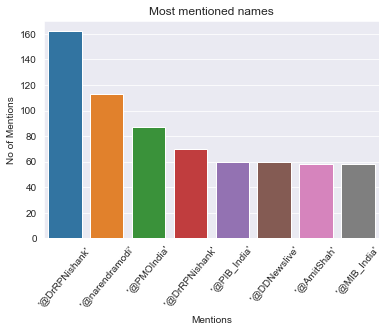

In [83]:
sns.barplot(x=d,y=v)
plt.xticks(rotation=50)
plt.title('Most mentioned names')
plt.ylabel('No of Mentions')
plt.xlabel('Mentions')
plt.show()